### 목표 : 부족한 피쳐를 조합 생성하여 모델 성능 향상
- 특성공학 => 피쳐 추출/선택/생성
- 비선형의 데이터에 대한 피쳐 생성 ==> 곡선 형태의 회귀선 수식을 생성할 것
- 모듈 : sklearn.preprocessing 내에 포함
- 데이터 : fish.csv
- 피처 : Perch의 Height, Length, Width
- 타겟 : Perch의 Weight
- 학습유형 : 지도학습

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures

[1] 전처리 피처 조합 생성 살펴보기

In [2]:
# 모듀롤딩
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [3]:
# 인스턴스 생성
#poly = PolynomialFeatures() 
#poly = PolynomialFeatures(include_bias=False) #transform하면 1이 사라짐
poly = PolynomialFeatures(include_bias=False, degree = 5) #degree (차원) default값은 2이다. 여기서는 5차원까지 해보겠다.

'''
poly = PolynomialFeatures(interaction_only=True)
>>> poly.fit_transform(X)
[return값]
array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])
'''

'\npoly = PolynomialFeatures(interaction_only=True)\n>>> poly.fit_transform(X)\n[return값]\narray([[ 1.,  0.,  1.,  0.],\n       [ 1.,  2.,  3.,  6.],\n       [ 1.,  4.,  5., 20.]])\n'

In [4]:
poly.fit([[2,3]])

PolynomialFeatures(degree=5, include_bias=False)

In [5]:
poly.transform([[2, 3]])    # a=2, b=3

# 2,3,4,6,9,8,12,18,27,16,24,36,54,81,32,48,72,108,162,243
# degree=5 => 5차항까지 구하기
# 1차항 a,b,
# 2차항 a^2,ab,b^2,
# 3차항 a^3,a^2*b,a*b^2,b^3,
# 4차항 a^4,a^3*b,a^2*b^2,a*b^3,b^4
# 5차항 a^5,a^4*b,a^3*b^2,a^2*b^3,a^b^4,b^5

array([[  2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.,  16.,  24.,
         36.,  54.,  81.,  32.,  48.,  72., 108., 162., 243.]])

In [6]:
poly.get_feature_names_out()
# 위의 연산 결과가 어떻게 나왔는지 보여줌.

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

In [7]:
# 그래서 이걸 왜 하는데??
# => 피처를 가공해서 더 높은 성능을 가지도록 하는것임. 여기서 말하는 '차원'은 2D, 3D가 아니라 지수를 의미 (2제곱, 3제곱 ,,, )
# 여기서도 어떤 차원일 때 성능이 제일 높은지 알아봐야 할것이다~

[2] Perch 데이터를 최대한 만족하는 회귀선을 찾기

[2-1] 모듈로딩 및 데이터 준비 <hr>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 데이터 준비
data_file = '../data/fish.csv'

dataDF = pd.read_csv(data_file)
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [10]:
# 불필요한 컬럼 제거
dataDF.drop('Diagonal', axis = 1, inplace = True)

In [11]:
# perch행만 추출
perchDF = dataDF[dataDF.Species == 'Perch']

In [12]:
# perch가 적힌 열 삭제
perchDF = perchDF.drop('Species', axis = 'columns').copy()

In [13]:
# 행 인덱스 초기화
perchDF.reset_index(drop = True, inplace = True)

In [14]:
perchDF

,Weight,Length,Height,Width
0,5.9,8.4,2.1120,1.4080
1,32.0,13.7,3.5280,1.9992
2,40.0,15.0,3.8240,2.4320
3,51.5,16.2,4.5924,2.6316
4,70.0,17.4,4.5880,2.9415
5,100.0,18.0,5.2224,3.3216
6,78.0,18.7,5.1992,3.1234
7,80.0,19.0,5.6358,3.0502
8,85.0,19.6,5.1376,3.0368
9,85.0,20.0,5.0820,2.7720


[2-2] 데이터 확인 <hr>
- 학습 유형 결정 위한 단계
- 피처 스케일링 진행 여부 체크

In [15]:
target = perchDF['Weight']
target.head()

0     5.9
1    32.0
2    40.0
3    51.5
4    70.0
Name: Weight, dtype: float64

In [16]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 56 entries, 0 to 55
Series name: Weight
Non-Null Count  Dtype  
--------------  -----  
56 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [17]:
feature = perchDF[['Length', 'Height', 'Width']]
feature.head()

,Length,Height,Width
0,8.4,2.1120,1.4080
1,13.7,3.5280,1.9992
2,15.0,3.8240,2.4320
3,16.2,4.5924,2.6316
4,17.4,4.5880,2.9415


In [18]:
corr_list = perchDF.corr()['Weight'].tolist()
corr_list = corr_list[1:]
#corr_list
for i in range(len(corr_list)):
    corr_list[i] = round(corr_list[i], 3)
corr_list

[0.959, 0.968, 0.964]

In [19]:
feature.shape[1]

3

In [20]:
feature[feature.columns[0]]

0      8.4
1     13.7
2     15.0
3     16.2
4     17.4
5     18.0
6     18.7
7     19.0
8     19.6
9     20.0
10    21.0
11    21.0
12    21.0
13    21.3
14    22.0
15    22.0
16    22.0
17    22.0
18    22.0
19    22.5
20    22.5
21    22.7
22    23.0
23    23.5
24    24.0
25    24.0
26    24.6
27    25.0
28    25.6
29    26.5
30    27.3
31    27.5
32    27.5
33    27.5
34    28.0
35    28.7
36    30.0
37    32.8
38    34.5
39    35.0
40    36.5
41    36.0
42    37.0
43    37.0
44    39.0
45    39.0
46    39.0
47    40.0
48    40.0
49    40.0
50    40.0
51    42.0
52    43.0
53    43.0
54    43.5
55    44.0
Name: Length, dtype: float64

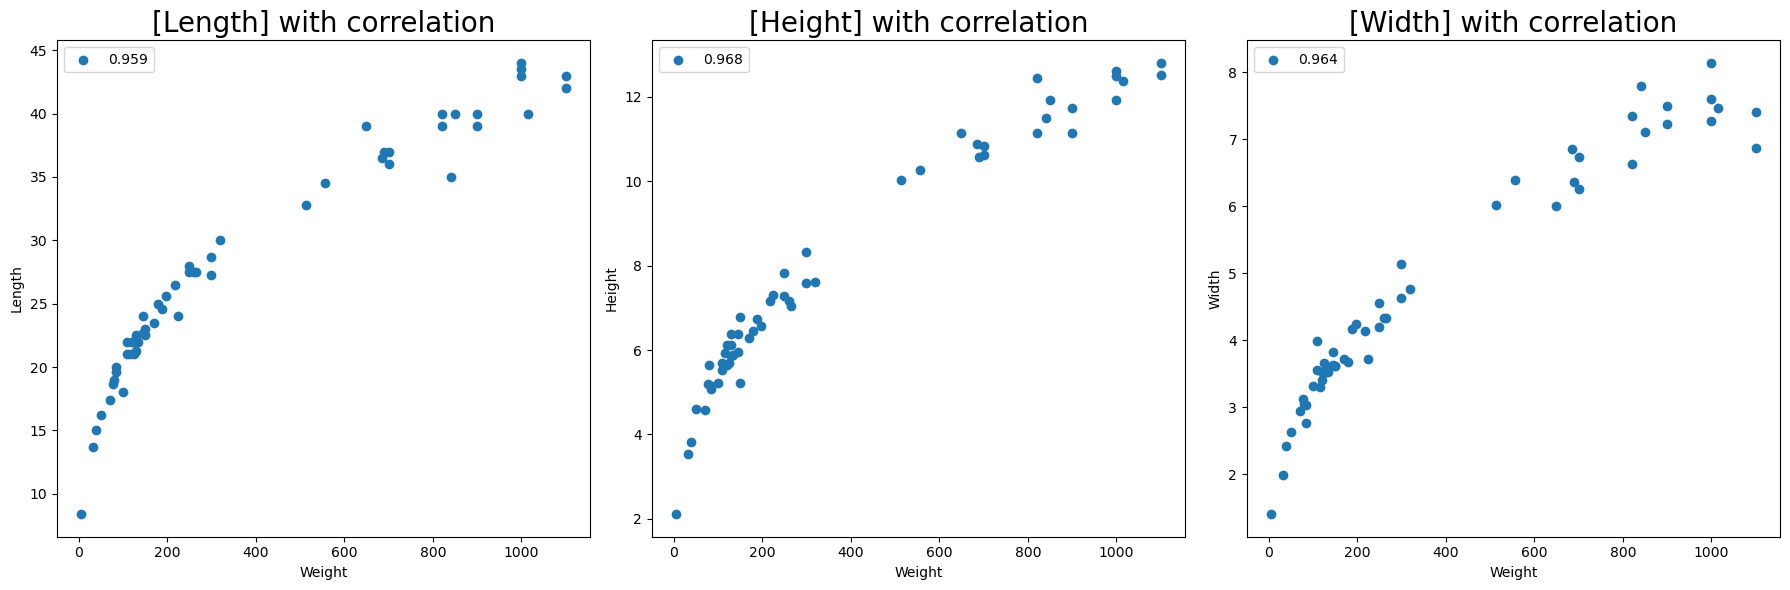

In [21]:
plt.figure(figsize = (18, 6))
for idx in range(feature.shape[1]):
    plt.subplot(1, 3, idx+1)
    plt.scatter(target[:], feature[feature.columns[idx]], label = corr_list[idx])
    plt.xlabel('Weight')
    plt.ylabel(feature.columns[idx])
    plt.legend()
    plt.title(f"[{feature.columns[idx]}] with correlation", fontsize = 20)
plt.tight_layout()
plt.show()

## [ TO DO ]
- 피처를 생각하지 않고 하나 해보기
- 전처리에서 피처를 적용해서 회귀 해보기
- 그래서 이 둘을 비교해보라

(3) 학습 준비      
- 학습 알고리즘 : 양의 선형관계 파악됨 => 선형 모델
- 학습 데이터 준비 : 학습용 & 테스트용데이터셋 분리
- 전처리 : 스케일링, PolynomialFeatures 처리

(3-1) 학습 데이터 준비

In [22]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state = 10)

In [23]:
print(f"[훈련용]  X_train: {X_train.shape}    y_train: {y_train.shape}")
print(f"[테스트용] X_test: {X_test.shape}    y_test: {y_test.shape}")

[훈련용]  X_train: (44, 3)    y_train: (44,)
[테스트용] X_test: (12, 3)    y_test: (12,)


(3-2) 피처를 스케일링 해보자

In [24]:
"""
scale_list = [StandardScaler, MinMaxScaler, RobustScaler]

def train_variety(scale_type):
    scaler = scale_type()
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    print(scaled_X_train)
    print(scaled_X_test)
"""

'\nscale_list = [StandardScaler, MinMaxScaler, RobustScaler]\n\ndef train_variety(scale_type):\n    scaler = scale_type()\n    scaler.fit(X_train)\n    scaled_X_train = scaler.transform(X_train)\n    scaled_X_test = scaler.transform(X_test)\n    \n    print(scaled_X_train)\n    print(scaled_X_test)\n'

In [25]:
"""
scaler=StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

plt.scatter(X_train, y_train, color = 'red')
plt.xlabel('X_train')
plt.ylabel('y_train')
"""

"\nscaler=StandardScaler()\nscaler.fit(X_train)\nscaled_X_train = scaler.transform(X_train)\nscaled_X_test = scaler.transform(X_test)\n\nplt.scatter(X_train, y_train, color = 'red')\nplt.xlabel('X_train')\nplt.ylabel('y_train')\n"

poly로 전처리 해보자

In [26]:
# 인스턴스 생성
degree_num = 2
poly = PolynomialFeatures(include_bias=False, degree = degree_num)
poly

PolynomialFeatures(include_bias=False)

In [27]:
poly.fit(perchDF)

PolynomialFeatures(include_bias=False)

In [28]:
perchDF

,Weight,Length,Height,Width
0,5.9,8.4,2.1120,1.4080
1,32.0,13.7,3.5280,1.9992
2,40.0,15.0,3.8240,2.4320
3,51.5,16.2,4.5924,2.6316
4,70.0,17.4,4.5880,2.9415
5,100.0,18.0,5.2224,3.3216
6,78.0,18.7,5.1992,3.1234
7,80.0,19.0,5.6358,3.0502
8,85.0,19.6,5.1376,3.0368
9,85.0,20.0,5.0820,2.7720


In [29]:
poly_df = poly.transform(perchDF)
# numpy.ndarray의 형태로 반환값이 나옴
poly_df

array([[5.90000000e+00, 8.40000000e+00, 2.11200000e+00, 1.40800000e+00,
        3.48100000e+01, 4.95600000e+01, 1.24608000e+01, 8.30720000e+00,
        7.05600000e+01, 1.77408000e+01, 1.18272000e+01, 4.46054400e+00,
        2.97369600e+00, 1.98246400e+00],
       [3.20000000e+01, 1.37000000e+01, 3.52800000e+00, 1.99920000e+00,
        1.02400000e+03, 4.38400000e+02, 1.12896000e+02, 6.39744000e+01,
        1.87690000e+02, 4.83336000e+01, 2.73890400e+01, 1.24467840e+01,
        7.05317760e+00, 3.99680064e+00],
       [4.00000000e+01, 1.50000000e+01, 3.82400000e+00, 2.43200000e+00,
        1.60000000e+03, 6.00000000e+02, 1.52960000e+02, 9.72800000e+01,
        2.25000000e+02, 5.73600000e+01, 3.64800000e+01, 1.46229760e+01,
        9.29996800e+00, 5.91462400e+00],
       [5.15000000e+01, 1.62000000e+01, 4.59240000e+00, 2.63160000e+00,
        2.65225000e+03, 8.34300000e+02, 2.36508600e+02, 1.35527400e+02,
        2.62440000e+02, 7.43968800e+01, 4.26319200e+01, 2.10901378e+01,
        1.208

In [30]:
poly.get_feature_names_out()
# 위의 연산 결과가 어떻게 나왔는지 보여줌.

array(['Weight', 'Length', 'Height', 'Width', 'Weight^2', 'Weight Length',
       'Weight Height', 'Weight Width', 'Length^2', 'Length Height',
       'Length Width', 'Height^2', 'Height Width', 'Width^2'],
      dtype=object)

In [31]:
# n.array 형태로 나왔으니 그걸 데이터프레임의 형식으로 수정했다.
poly_df = pd.DataFrame(poly_df, columns = poly.get_feature_names_out())
poly_df

,Weight,Length,Height,Width,Weight^2,Weight Length,Weight Height,Weight Width,Length^2,Length Height,Length Width,Height^2,Height Width,Width^2
0,5.9,8.4,2.1120,1.4080,34.81,49.56,12.4608,8.3072,70.56,17.74080,11.82720,4.460544,2.973696,1.982464
1,32.0,13.7,3.5280,1.9992,1024.00,438.40,112.8960,63.9744,187.69,48.33360,27.38904,12.446784,7.053178,3.996801
2,40.0,15.0,3.8240,2.4320,1600.00,600.00,152.9600,97.2800,225.00,57.36000,36.48000,14.622976,9.299968,5.914624
3,51.5,16.2,4.5924,2.6316,2652.25,834.30,236.5086,135.5274,262.44,74.39688,42.63192,21.090138,12.085360,6.925319
4,70.0,17.4,4.5880,2.9415,4900.00,1218.00,321.1600,205.9050,302.76,79.83120,51.18210,21.049744,13.495602,8.652422
5,100.0,18.0,5.2224,3.3216,10000.00,1800.00,522.2400,332.1600,324.00,94.00320,59.78880,27.273462,17.346724,11.033027
6,78.0,18.7,5.1992,3.1234,6084.00,1458.60,405.5376,243.6252,349.69,97.22504,58.40758,27.031681,16.239181,9.755628
7,80.0,19.0,5.6358,3.0502,6400.00,1520.00,450.8640,244.0160,361.00,107.08020,57.95380,31.762242,17.190317,9.303720
8,85.0,19.6,5.1376,3.0368,7225.00,1666.00,436.6960,258.1280,384.16,100.69696,59.52128,26.394934,15.601864,9.222154
9,85.0,20.0,5.0820,2.7720,7225.00,1700.00,431.9700,235.6200,400.00,101.64000,55.44000,25.826724,14.087304,7.683984


In [32]:
col_list = poly_df.columns.tolist()
col_list

['Weight',
 'Length',
 'Height',
 'Width',
 'Weight^2',
 'Weight Length',
 'Weight Height',
 'Weight Width',
 'Length^2',
 'Length Height',
 'Length Width',
 'Height^2',
 'Height Width',
 'Width^2']

In [33]:
sample_list = []
for col in col_list:
    if 'Weight' in col:
        sample_list.append(col)
print(sample_list)

['Weight', 'Weight^2', 'Weight Length', 'Weight Height', 'Weight Width']


# [오늘 과제] auto-mpg 파일로 연비 예측해보는거 (예전에 했던거) 처음부터 끝까지 해보기